#### Описание данных:
 <ul>
    <li><strong>"year"</strong> - year (1990-2017)</li>
<li><strong>"region"</strong> - name of a federal subject of Russia. It could be oblast, republic, krai, autonomous okrug, federal city and a single autonomous oblast</li>
<li><strong>"npg"</strong> - natural population growth by 1000 people. Calculating as the difference between birth rate and death rate</li>
<li><strong>"birth_rate"</strong> - number of births by 1000 people</li>
<li><strong>"death_rate"</strong> - number of deaths by 1000 people</li>
<li><strong>"gdw"</strong> - general demographic weight (how many people of non-woking age account for 100 people of working age). Working age for men 16-60 years, for women 16-55 years</li>
<li><strong>"urbanization"</strong> - % of urban population</li>
    </ul>
    Источник <a href='https://www.kaggle.com/datasets/dwdkills/russian-demography'>Russian Demography Data (1990-2017)</a>

In [200]:
import pandas as pd
import numpy as np
df=pd.read_csv('/Users/kamilayuldasheva/Downloads/russian_demography.csv',sep=',')
df

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2380 entries, 0 to 2379
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          2380 non-null   int64  
 1   region        2380 non-null   object 
 2   npg           2317 non-null   float64
 3   birth_rate    2317 non-null   float64
 4   death_rate    2315 non-null   float64
 5   gdw           2330 non-null   float64
 6   urbanization  2330 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 130.3+ KB


Анализ показал что у нас есть данные 5 колонок с данными типа flot64 - переменные с плавающими значениями; одна колонка с данными типа int64 - это данные с целами числами, в нашем случае это года. Также есть данные которые прогромма воспинирает как строку (object). Видим, что в данных есть пропущенные значения. 

In [202]:
df.isna().sum()

year             0
region           0
npg             63
birth_rate      63
death_rate      65
gdw             50
urbanization    50
dtype: int64

In [203]:
df.dropna()

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


In [204]:
df=df.dropna()

Отчистили датасет от строк с пропущенными значениями - 65 строк. Мы решили именно удалить а не подставить так как строк с пропущенными значениями немного и их удаление не повлияет на результаты нашего датасета. Далее переименуем колонки:

In [205]:
df.rename(columns = {'npg': 'natural population growth', 'gdw': 'unemployment rate'}, inplace=True)

/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_1164/468038067.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns = {'npg': 'natural population growth', 'gdw': 'unemployment rate'}, inplace=True)


In [206]:
df

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70


### Уровень рождаемости и урбанизации

Проанализируем показатель birth_rate: посмотрим максимальное и минимальное значение

In [207]:
df['birth_rate'].max()

29.9

In [208]:
df['birth_rate'].min()

6.2

Ниже мы определим регионы с высокой рождаемостью. Как мы видим в топ-3 входят: Республика Тува, Чеченская Республика и Республика Ингушетия 

In [209]:
df[df['birth_rate']>=20]['region'].value_counts()

Tuva Republic                19
Chechen Republic             17
Republic of Ingushetia       10
Altai Republic                7
Republic of Dagestan          6
Kabardino-Balkar Republic     1
Republic of Kalmykia          1
Name: region, dtype: int64

Далее определим годы с высокой рождаемостью. Высокая рождаемость наблюдается в 1990, 2014 и 2013 году

In [210]:
df[df['birth_rate']>=20]['year'].value_counts()

1990    5
2014    4
2013    4
2012    4
2011    4
2010    4
1995    3
2009    3
2008    3
1991    3
2007    2
2016    2
2015    2
2017    2
2004    2
2003    2
1994    2
1993    2
1992    2
2006    1
2000    1
1999    1
1997    1
1996    1
2005    1
Name: year, dtype: int64

Проанализируем колонку urbanization

In [211]:
df['urbanization'].max()

100.0

In [212]:
df['urbanization'].min()

23.63

Ниже можно увидеть регионы с высокой рождаемостью и с низким уровним убранизации

In [213]:
df[(df['birth_rate']>=20)&(df['region'])&(df['year'])& (df['urbanization']<=40)]

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization
442,1995,Republic of Ingushetia,18.5,25.3,6.8,80.83,29.48
1184,2003,Chechen Republic,18.4,24.9,6.5,75.80,33.75
1354,2005,Chechen Republic,19.8,24.9,5.1,73.00,34.40
1524,2007,Chechen Republic,22.4,27.1,4.8,69.75,35.00
1668,2009,Altai Republic,8.4,20.3,12.2,61.42,27.10
1694,2009,Chechen Republic,23.8,29.1,5.4,70.85,35.90
1802,2011,Republic of Ingushetia,23.0,27.0,4.0,67.37,38.40
1838,2011,Altai Republic,10.5,22.7,12.2,66.73,27.70
1864,2011,Chechen Republic,23.7,29.0,5.3,73.05,34.90
1972,2013,Republic of Ingushetia,17.7,21.2,3.5,68.15,39.90


In [214]:
df[(df['birth_rate']>=20)&(df['region'])&(df['year'])& (df['urbanization']>=70)]

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization


Здесь мы хотели найти регионы с высокой урбанизацией и высокой рождаемостью. В результате, как мы видим, таких регионов нет

Создадим новую переменную level of birth rate - уровень рождаемости для последующего анализа

In [215]:
def get_birth_rate(br):
    if br < 10:
        return 'Low birth rate'
    elif br < 20:
        return 'Average birth rate'
    elif br >= 20:
        return 'High birth rate'
    else:
        return br


Сделаем переменную категориальной

In [216]:
df['birth_rate'].apply(get_birth_rate) 
df['level of birth rate'] = df['birth_rate'].apply(get_birth_rate) 
df['level of birth rate'] = pd.Categorical(df['level of birth rate'])

/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_1164/517603569.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level of birth rate'] = df['birth_rate'].apply(get_birth_rate)
/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_1164/517603569.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level of birth rate'] = pd.Categorical(df['level of birth rate'])


Проверим, получилось ли изменить

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2315 entries, 0 to 2379
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   year                       2315 non-null   int64   
 1   region                     2315 non-null   object  
 2   natural population growth  2315 non-null   float64 
 3   birth_rate                 2315 non-null   float64 
 4   death_rate                 2315 non-null   float64 
 5   unemployment rate          2315 non-null   float64 
 6   urbanization               2315 non-null   float64 
 7   level of birth rate        2315 non-null   category
dtypes: category(1), float64(5), int64(1), object(1)
memory usage: 147.1+ KB


In [218]:
df['level of birth rate'].cat.categories

Index(['Average birth rate', 'High birth rate', 'Low birth rate'], dtype='object')

Создадим еще одну переменную level of urbanization -  уровень урбанизации

In [219]:
def get__urbanization(urb):
    if urb < 40:
        return 'Low urbanization '
    elif urb < 70:
        return 'Medium urbanization'
    elif urb >= 70:
        return 'Max urbanization'
    else:
        return urb

In [220]:
df['urbanization'].apply(get__urbanization) 
df['level of urbanization'] = df['urbanization'].apply(get__urbanization) 
df['level of urbanization'] = pd.Categorical(df['level of urbanization'])

/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_1164/259443583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level of urbanization'] = df['urbanization'].apply(get__urbanization)
/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_1164/259443583.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level of urbanization'] = pd.Categorical(df['level of urbanization'])


Проверяем

In [221]:
df['level of urbanization'].cat.categories

Index(['Low urbanization ', 'Max urbanization', 'Medium urbanization'], dtype='object')

Проверем какая урбанизация регионов по всей России. Как мы видим большая часть регионов с высоким и средним уровнем урбанизации

In [222]:
df.groupby('level of urbanization').size()

level of urbanization
Low urbanization         52
Max urbanization       1132
Medium urbanization    1131
dtype: int64

Визуализируем

<AxesSubplot:ylabel='None'>

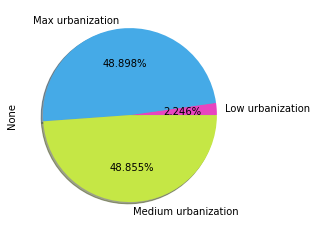

In [223]:
colors = ['#E745C0', '#45AAE7', '#C5E745']
df.groupby('level of urbanization').size().plot(kind = 'pie',colors = colors,shadow = True, 
                                                autopct = '%.3f%%')

Проверем уровень рождаемости регионов по всей России. Видим, что уровень рождаемости в основном на среднем уровне

In [224]:
df.groupby('level of birth rate').size()

level of birth rate
Average birth rate    1479
High birth rate         61
Low birth rate         775
dtype: int64

<AxesSubplot:ylabel='None'>

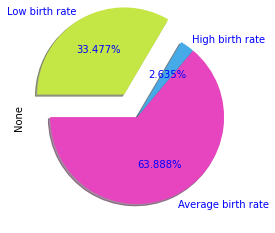

In [225]:
colors = ['#E745C0', '#45AAE7', '#C5E745']
df.groupby('level of birth rate').size().plot(kind = 'pie',colors = colors, explode = [0, 0 , 0.3], 
                                                shadow = True, 
                                                autopct = '%.3f%%', 
                                                textprops = {'color': 'b'},
                                               startangle = 180 )

Посмотрим на зависимость уровня урбанизации и уровеня рождаемости и визуализируем

In [226]:
df.groupby('level of urbanization')['level of birth rate'].value_counts()

level of urbanization                    
Low urbanization       Average birth rate     26
                       High birth rate        26
                       Low birth rate          0
Max urbanization       Average birth rate    706
                       Low birth rate        426
                       High birth rate         0
Medium urbanization    Average birth rate    747
                       Low birth rate        349
                       High birth rate        35
Name: level of birth rate, dtype: int64

<AxesSubplot:xlabel='level of urbanization'>

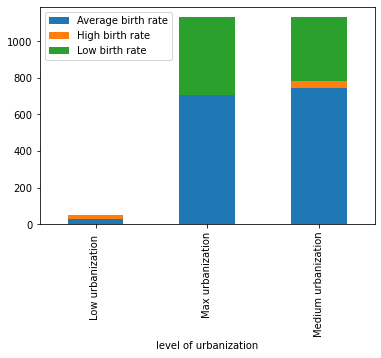

In [227]:
df.groupby('level of urbanization')['level of birth rate'
                           ].value_counts().unstack().plot(kind = 'bar', stacked = True)

### Уровень смертности и уровень рождаемости

In [228]:
df['death_rate'].describe()

count    2315.000000
mean       13.901382
std         3.499475
min         3.200000
25%        12.100000
50%        14.100000
75%        16.100000
max        24.900000
Name: death_rate, dtype: float64

In [229]:
df['birth_rate'].describe()

count    2315.000000
mean       11.548207
std         3.234236
min         6.200000
25%         9.300000
50%        11.000000
75%        13.000000
max        29.900000
Name: birth_rate, dtype: float64

Посмотрим моду в двух столбцах

In [230]:
df['birth_rate'].mode()

0    10.9
Name: birth_rate, dtype: float64

In [231]:
df['death_rate'].mode()

0    14.1
Name: death_rate, dtype: float64

Узнаем сколько выбросов в столбце birth_rate

In [232]:
q3=np.percentile(df['birth_rate'],75)
q1=np.percentile(df['birth_rate'],25)
iqr=q3-q1
iqr

3.6999999999999993

In [233]:
iqr_bottom=q1-1.5*iqr
iqr_top=q3+1.5*iqr
iqr_bottom,iqr_top

(3.7500000000000018, 18.549999999999997)

In [234]:
df[df['birth_rate']>iqr_top].shape


(80, 9)

Как мы выяснили выбросов 80. Это значения больше 18,5. Мы не берем в анализе нижнюю границу (iqr_bottom=3.75) так как минимальное значение уровня рождаемости -  6.2

Посмотрим, в каких первых 40 регионах из списка содержутся выбросы 

In [235]:
df[df['birth_rate']>iqr_top].head(40)

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization,level of birth rate,level of urbanization
13,1990,Republic of Dagestan,19.9,26.1,6.2,94.26,43.49,High birth rate,Medium urbanization
19,1990,Kabardino-Balkar Republic,11.5,20.0,8.5,80.03,60.86,High birth rate,Medium urbanization
21,1990,Republic of Kalmykia,12.7,20.9,8.2,77.44,45.81,High birth rate,Medium urbanization
53,1990,Altai Republic,8.4,19.3,10.9,90.07,27.17,Average birth rate,Low urbanization
55,1990,Tuva Republic,17.7,26.3,8.6,82.84,46.97,High birth rate,Medium urbanization
79,1990,Chechen Republic,15.8,24.1,8.3,89.49,43.86,High birth rate,Medium urbanization
82,1990,Sakha (Yakutia) Republic,12.7,19.4,6.7,64.27,66.88,Average birth rate,Medium urbanization
98,1991,Republic of Dagestan,18.6,24.9,6.3,95.05,43.97,High birth rate,Medium urbanization
104,1991,Kabardino-Balkar Republic,10.1,19.0,8.9,80.59,60.97,Average birth rate,Medium urbanization
106,1991,Republic of Kalmykia,11.1,19.5,8.4,78.73,45.98,Average birth rate,Medium urbanization


Проверим, что выбросов в нижней границы нет так как минимальное значение уровня рождаемости -  6.2

In [236]:
df[df['birth_rate']<iqr_bottom].shape

(0, 9)

Ниже видим, что выбросов по рождаемости больше там, где высокий уровень рождаемости: Республика Тува, Чеченская Республика и Республика Ингушетия

In [237]:
df[df['birth_rate']>iqr_top]['region'].value_counts()

Tuva Republic                23
Chechen Republic             18
Republic of Ingushetia       13
Republic of Dagestan         11
Altai Republic               10
Kabardino-Balkar Republic     2
Republic of Kalmykia          2
Sakha (Yakutia) Republic      1
Name: region, dtype: int64

Посмотрим в какие годы было больше всего выбросов

In [238]:
df[df['birth_rate']>iqr_top]['year'].value_counts()

1990    7
2014    5
2013    5
2012    5
2011    5
1991    5
2010    4
2009    4
1992    3
2015    3
1995    3
1996    3
2008    3
2007    3
2006    2
2016    2
2004    2
2005    2
2003    2
1994    2
1993    2
2017    2
2002    1
2001    1
2000    1
1999    1
1998    1
1997    1
Name: year, dtype: int64

In [239]:
import scipy.stats
scipy.stats.zscore(df['death_rate'])

0      -0.457705
1      -0.800688
2      -1.515235
3      -1.172253
4      -1.000761
          ...   
2375   -0.371960
2376   -1.286580
2377   -1.658145
2378   -2.572765
2379    0.371169
Name: death_rate, Length: 2315, dtype: float64

Рассмотрим данные по уровню смертности через z-оценку. Для этого создадим новую переменную death_z_score

In [240]:
df['death_z_score']=scipy.stats.zscore(df['death_rate'])

/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_1164/1696910401.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['death_z_score']=scipy.stats.zscore(df['death_rate'])


In [241]:
df

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization,level of birth rate,level of urbanization,death_z_score
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42,Average birth rate,Medium urbanization,-0.457705
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07,Average birth rate,Medium urbanization,-0.800688
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37,Average birth rate,Medium urbanization,-1.515235
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63,Average birth rate,Max urbanization,-1.172253
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01,Average birth rate,Medium urbanization,-1.000761
...,...,...,...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00,Average birth rate,Medium urbanization,-0.371960
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00,Average birth rate,Max urbanization,-1.286580
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50,Average birth rate,Medium urbanization,-1.658145
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70,Average birth rate,Max urbanization,-2.572765


Построим гистограмму чтобы оценить визуально. Видим, что выбросов по переменной немного и они находятся за пределами (-3 и 3)

<AxesSubplot:>

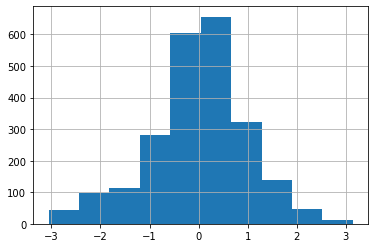

In [242]:
df['death_z_score'].hist()

In [243]:
df[df['death_z_score']<-3].shape

(5, 10)

In [244]:
df[df['death_z_score']>3].shape

(2, 10)

Выяснили, что выбросов 7. Посмотрим в каких они строках

In [245]:
df[df['death_z_score']<-3]

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization,level of birth rate,level of urbanization,death_z_score
83,1990,Yamalo-Nenets Autonomous Okrug,13.1,16.4,3.3,53.35,78.97,Average birth rate,Max urbanization,-3.030075
168,1991,Yamalo-Nenets Autonomous Okrug,11.3,14.7,3.4,53.22,82.69,Average birth rate,Max urbanization,-3.001493
2142,2015,Republic of Ingushetia,15.2,18.5,3.3,69.36,40.70,Average birth rate,Medium urbanization,-3.030075
2227,2016,Republic of Ingushetia,13.0,16.3,3.3,70.32,41.30,Average birth rate,Medium urbanization,-3.030075
2312,2017,Republic of Ingushetia,13.1,16.3,3.2,70.42,41.80,Average birth rate,Medium urbanization,-3.058657


In [246]:
df[df['death_z_score']>3]

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization,level of birth rate,level of urbanization,death_z_score
1157,2003,Pskov Oblast,-15.9,9.0,24.9,70.72,66.19,Low birth rate,Medium urbanization,3.143613
1327,2005,Pskov Oblast,-15.7,8.8,24.6,66.46,67.80,Low birth rate,Medium urbanization,3.057867


Проверим гипотезу, что чем лучше урбанизация тем меньше смертность

In [247]:
df.groupby('level of urbanization')['death_z_score'].mean()

level of urbanization
Low urbanization      -1.230516
Max urbanization       0.102772
Medium urbanization   -0.046288
Name: death_z_score, dtype: float64

Гипотеза не подтвердилась

Посмотрим на то, есть ли корреляция урбанизации с уровенем безработицы

In [248]:
df['unemployment rate'].corr(df['urbanization'])

-0.34527989628582395

Видим, что есть небольшая обратная корреляция. Если уровень безработицы высокий там где менее урбанизировнный регион.

Проверим корреляцию между natural population growth и birth_rate. По идеи она должна быть прямой так как natural population growth зависит от birth_rate 

In [249]:
df['natural population growth'].corr(df['birth_rate'])

0.8915355335585898

Действительно видим прямую и сильную корреляцию так как значение ближе к 1. Посмотрим корреляцию на графике

<AxesSubplot:xlabel='natural population growth', ylabel='birth_rate'>

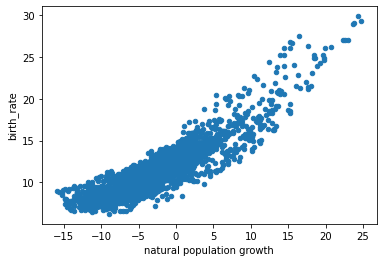

In [250]:
df.plot('natural population growth','birth_rate', kind='scatter')

### Уровень безработицы

Cоздадим новую переменную level of unemployment для анализа 

In [251]:
df['unemployment rate'].min()

37.5

In [252]:
df['unemployment rate'].max()

95.05

In [253]:
def get__unemployment_rate(um):
    if um < 50:
        return 'Low unemployment'
    elif um < 70:
        return 'Medium unemployment'
    elif um >= 70:
        return 'Max unemployment'
    else:
        return um

In [254]:
df['unemployment rate'].apply(get__unemployment_rate) 
df['level of unemployment'] = df['unemployment rate'].apply(get__unemployment_rate) 
df['level of unemployment'] = pd.Categorical(df['level of unemployment'])

/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_1164/2575262518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level of unemployment'] = df['unemployment rate'].apply(get__unemployment_rate)
/var/folders/ff/s3b09m1j2jlfm20jwzs75y300000gn/T/ipykernel_1164/2575262518.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['level of unemployment'] = pd.Categorical(df['level of unemployment'])


In [255]:
df

,year,region,natural population growth,birth_rate,death_rate,unemployment rate,urbanization,level of birth rate,level of urbanization,death_z_score,level of unemployment
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42,Average birth rate,Medium urbanization,-0.457705,Max unemployment
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07,Average birth rate,Medium urbanization,-0.800688,Max unemployment
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37,Average birth rate,Medium urbanization,-1.515235,Medium unemployment
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63,Average birth rate,Max urbanization,-1.172253,Max unemployment
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01,Average birth rate,Medium urbanization,-1.000761,Max unemployment
...,...,...,...,...,...,...,...,...,...,...,...
2375,2017,Chuvash Republic,-1.3,11.3,12.6,76.63,62.00,Average birth rate,Medium urbanization,-0.371960,Max unemployment
2376,2017,Chukotka Autonomous Okrug,3.7,13.1,9.4,58.23,70.00,Average birth rate,Max urbanization,-1.286580,Medium unemployment
2377,2017,Sakha (Yakutia) Republic,6.4,14.5,8.1,70.10,65.50,Average birth rate,Medium urbanization,-1.658145,Max unemployment
2378,2017,Yamalo-Nenets Autonomous Okrug,9.1,14.0,4.9,53.57,83.70,Average birth rate,Max urbanization,-2.572765,Medium unemployment


Посмотрим какая безработица по всем годам

In [256]:
df.groupby('level of unemployment').size()

level of unemployment
Low unemployment        119
Max unemployment       1031
Medium unemployment    1165
dtype: int64

In [257]:
df['year'][df['level of unemployment']=='Max unemployment'].mode()

0    2017
Name: year, dtype: int64

In [258]:
df['year'][df['level of unemployment']=='Low unemployment'].mode()

0    2004
1    2005
2    2006
3    2007
Name: year, dtype: int64

In [259]:
df['region'][df['level of unemployment']=='Max unemployment'].value_counts()

Republic of Adygea          20
Tula Oblast                 20
Tver Oblast                 20
Ryazan Oblast               20
Pskov Oblast                20
                            ..
Nenets Autonomous Okrug      2
Sakhalin Oblast              2
Primorsky Krai               1
Komi Republic                1
Sakha (Yakutia) Republic     1
Name: region, Length: 78, dtype: int64

In [260]:
df['region'][df['level of unemployment']=='Max unemployment'].value_counts().head(10)

Republic of Adygea                  20
Tula Oblast                         20
Tver Oblast                         20
Ryazan Oblast                       20
Pskov Oblast                        20
Tambov Oblast                       19
Republic of North Ossetia-Alania    19
Tuva Republic                       19
Novgorod Oblast                     19
Kursk Oblast                        19
Name: region, dtype: int64

In [261]:
df['region'][df['level of unemployment']=='Low unemployment'].value_counts().head(10)

Chukotka Autonomous Okrug                23
Yamalo-Nenets Autonomous Okrug           21
Kamchatka Krai                           20
Magadan Oblast                           19
Khanty–Mansi Autonomous Okrug – Yugra    16
Murmansk Oblast                          10
Sakhalin Oblast                           5
Komi Republic                             5
Name: region, dtype: int64

<AxesSubplot:xlabel='level of unemployment'>

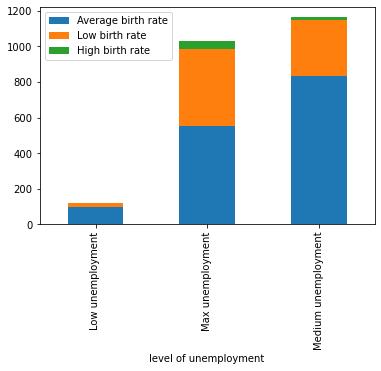

In [262]:
df.groupby('level of unemployment')['level of birth rate'
                           ].value_counts().unstack().plot(kind = 'bar', stacked = True)

Низкий уровень рождаемости в регионах с высоким уровнем безработицы

<AxesSubplot:xlabel='year'>

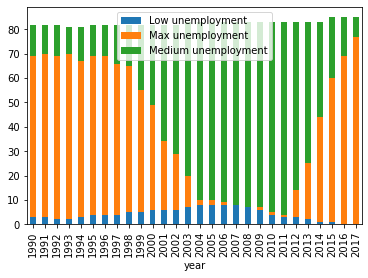

In [263]:
df.groupby('year')['level of unemployment'
                           ].value_counts().unstack().plot(kind = 'bar', stacked = True)

Здесь мы видим, что уровень безработицы активно начинает расти с 2012 года и достигает максимума в 2017 году

### Итог

  1.Больше всего выбросов по рожадемости в регионах с высокой рождаемостью - это Республика Тува, Чеченская Республика и Республика Ингушетия  
  2.Год с наиболее высокой рождаемостью - 1990  
  3.Нет регионов с высокоми показателями рождаемости и высокими показателями урбанизации за 1990-2017 год, хотя показателей с высоким уровнем урбанизации 1132, а это половина от всех данных по урбанизации (49%).  
  4.Регионы с высокой рождаемостью и с низким уровним убранизации - Республика Алтай, Чеченская Республика и Республика Ингушетия  
  5. В России очень мало регионов с низким уровнем урбанизации (2,5%)  
  6. Уровень рождаемости в России с 1990 по 2017 год - средней  
  7. Большая рождаемость в регионах со средним уровнем урбанизации  
  8. Наибольший уровень смертности был в Псковской области в 2003 и в 2005 году. Также в Псковской области низкий уровень рождаемости в эти годы.  
  9. Наименьший уровень смертности в Республике Ингушетия с 2015 по 2017 год, а также в Ямало Ненецком автономном округe
  10. Cуществует обратная корреляция между уровнем безработицы и урбанизацией
  11. Caмая высокая безработица чаще всего в регионах была в 2017 году
  12. Самая низкая с 2004 по 2007
  13. Cамая высокая безработица в Республике Адыгея,Тульская область, Тверская область, Рязанская область и Псковская область  
  14.Низкий уровень безработицы в Чукотском Автономном Округе
  15.Низкий уровень рождаемости в регионах с высоким уровнем безработицы
  16.Уровень безработицы аквтино растет с 2013 года